# TN electricity bill calculator:

date: 19.2.2025

1. Input: units , output: calculated bill
2. Input: bill_amount, output: estimated units

^C


In [ ]:
import pandas as pd 
import numpy as np
import os

## Load Dataset

In [85]:
DATA_FOLDER= "../data"

In [86]:

file_under500=os.path.join(DATA_FOLDER,r"under500.csv")
file_over500= os.path.join(DATA_FOLDER,r"over500.csv")

# Load dataset, dataset is ready
df_under500=pd.read_csv(filepath_or_buffer=file_under500)
df_over500=pd.read_csv(filepath_or_buffer=file_over500)

In [87]:
df_under500['slab']=df_under500['start'].astype('str')+"-"+df_under500['end'].astype('str')
df_under500=df_under500.set_index('slab')


In [88]:
df_over500['slab']=df_over500['start'].astype('str')+"-"+df_over500['end'].astype('str')
df_over500=df_over500.set_index('slab')
df_over500

,start,end,rate
slab,,,
0-100.0,0,100.0,0.00
100-400.0,100,400.0,4.70
400-500.0,400,500.0,6.30
500-600.0,500,600.0,8.40
600-800.0,600,800.0,9.45
800-1000.0,800,1000.0,10.50
1000-inf,1000,inf,11.55


# Compute slabwise- units consumed, units_consumed price

In [71]:

def compute_slabwise_consumption(*,units_consumed:int,df:pd.DataFrame):
    slabmarkers=df["start"].tolist()
    slabmarkers.append(np.inf)


    #calculate the splt

    remaining=units_consumed
    # [0-100: 100, 100-200: 100, 100-400: 100]
    D={}
    i=0
    L=[]
    for curr_slab,start,end in zip(df.index,df.start,df.end):
        end=np.float64(end)
        start=np.float64(start)

        consumed_by_slab=min(remaining,end-start)
        L.append(consumed_by_slab)
        remaining-=consumed_by_slab


        i+=1

        
    df["myunits"]=L
    
def compute_slabwise_price(*,df:pd.DataFrame):
     df["myunits_price"]=df["rate"]*df["myunits"]

    

In [ ]:
def calculate_bill(units_consumed):
    if units_consumed<=500:
        df=df_under500.copy()
        print("units_consumed<500, so Using under500 slab")
    else:
        df=df_over500.copy()
        print("units_consumed>500, so Using over500 slab")

    

    compute_slabwise_consumption(units_consumed=units_consumed,df=df)
    compute_slabwise_price(df=df)


    return {'amount':df["myunits_price"].sum(),'df':df,"units_consumed":units_consumed}

#config
units_consumed=500

#auto
amount=calculate_bill(units_consumed=units_consumed)['amount']
print(units_consumed,amount)

units_consumed<500, so Using under500 slab
500 1805.0


In [80]:
# lets create a map
def generate_precomputed_lookup_table():
    precomputed_lookup_table={}

    for units_consumed in range(0,3000,10):
        
        precomputed_lookup_table[units_consumed]=calculate_bill(units_consumed=units_consumed)['amount']

    return precomputed_lookup_table

precomputed_lookup_table=generate_precomputed_lookup_table()

units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consumed<500, so Using under500 slab
units_consu

c:\Users\vyoge_1r0rx2k\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\vyoge_1r0rx2k\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

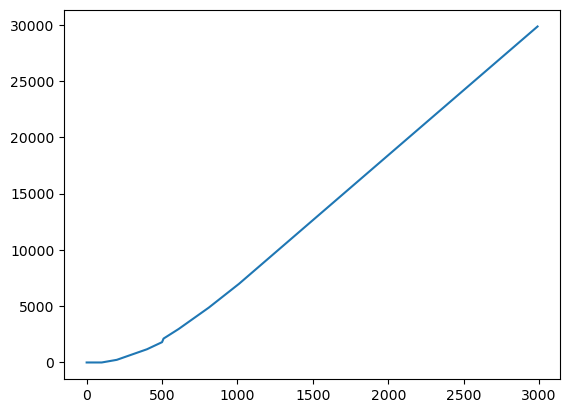

In [74]:
import matplotlib.pyplot as plt 
import seaborn as sns


sns.lineplot(data=precomputed_lookup_table)

In [75]:
calculate_bill(501)

units_consumed>500, so Using over500 slab


{'amount': 2048.4,
 'chart':             start     end   rate  myunits  myunits_price
 slab                                                    
 0-100.0         0   100.0   0.00    100.0            0.0
 100-400.0     100   400.0   4.70    300.0         1410.0
 400-500.0     400   500.0   6.30    100.0          630.0
 500-600.0     500   600.0   8.40      1.0            8.4
 600-800.0     600   800.0   9.45      0.0            0.0
 800-1000.0    800  1000.0  10.50      0.0            0.0
 1000-inf     1000     inf  11.55      0.0            0.0}

In [76]:
inverted={val:key for key, val in precomputed_lookup_table.items()}
inverted

{0.0: 100,
 23.5: 110,
 47.0: 120,
 70.5: 130,
 94.0: 140,
 117.5: 150,
 141.0: 160,
 164.5: 170,
 188.0: 180,
 211.5: 190,
 235.0: 200,
 282.0: 210,
 329.0: 220,
 376.0: 230,
 423.0: 240,
 470.0: 250,
 517.0: 260,
 564.0: 270,
 611.0: 280,
 658.0: 290,
 705.0: 300,
 752.0: 310,
 799.0: 320,
 846.0: 330,
 893.0: 340,
 940.0: 350,
 987.0: 360,
 1034.0: 370,
 1081.0: 380,
 1128.0: 390,
 1175.0: 400,
 1238.0: 410,
 1301.0: 420,
 1364.0: 430,
 1427.0: 440,
 1490.0: 450,
 1553.0: 460,
 1616.0: 470,
 1679.0: 480,
 1742.0: 490,
 1805.0: 500,
 2124.0: 510,
 2208.0: 520,
 2292.0: 530,
 2376.0: 540,
 2460.0: 550,
 2544.0: 560,
 2628.0: 570,
 2712.0: 580,
 2796.0: 590,
 2880.0: 600,
 2974.5: 610,
 3069.0: 620,
 3163.5: 630,
 3258.0: 640,
 3352.5: 650,
 3447.0: 660,
 3541.5: 670,
 3636.0: 680,
 3730.5: 690,
 3825.0: 700,
 3919.5: 710,
 4014.0: 720,
 4108.5: 730,
 4203.0: 740,
 4297.5: 750,
 4392.0: 760,
 4486.5: 770,
 4581.0: 780,
 4675.5: 790,
 4770.0: 800,
 4875.0: 810,
 4980.0: 820,
 5085.0: 83

In [77]:
len(inverted)


290

In [78]:
def binary_search(L:list,x:int):
    low=0
    high=len(L)-1

    i=0
    while (low<high and i<200):
        print(f"boundary {low} to {high}")
        i+=1

        mid=int((low+high)/2)
        if x==L[mid]:
            break
        elif x>L[mid]:
            
            low=mid
           
        else:
            high=mid

        if low+1==high:
            break
               
    print(f"boundary {low} to {high}")
    low=low
    high=high#int(np.round(high))
    print (L[low],L[high])
    return (L[low],L[high])

price=750
low,high=binary_search(list(inverted.keys()),price)


boundary 0 to 289
boundary 0 to 144
boundary 0 to 72
boundary 0 to 36
boundary 18 to 36
boundary 18 to 27
boundary 18 to 22
boundary 20 to 22
boundary 20 to 21
705.0 752.0


In [ ]:
def linear_interpolation(x,z1,z2):
    x1,y1=z1
    x2,y2=z2
    return y1 + (x - x1) / (x2 - x1) * (y2 - y1)

def esti(price,lowindex,highindex,D):
    lowerprice=D[lowindex]
    upperprice=D[highindex]

    print(lowerprice)
    print(upperprice)
    return linear_interpolation(price,(lowindex,lowerprice),(highindex,upperprice))

esti(price=price,lowindex=low,highindex=high,D=inverted)

300
310


309.5744680851064

In [89]:
inverted

{0.0: 100,
 23.5: 110,
 47.0: 120,
 70.5: 130,
 94.0: 140,
 117.5: 150,
 141.0: 160,
 164.5: 170,
 188.0: 180,
 211.5: 190,
 235.0: 200,
 282.0: 210,
 329.0: 220,
 376.0: 230,
 423.0: 240,
 470.0: 250,
 517.0: 260,
 564.0: 270,
 611.0: 280,
 658.0: 290,
 705.0: 300,
 752.0: 310,
 799.0: 320,
 846.0: 330,
 893.0: 340,
 940.0: 350,
 987.0: 360,
 1034.0: 370,
 1081.0: 380,
 1128.0: 390,
 1175.0: 400,
 1238.0: 410,
 1301.0: 420,
 1364.0: 430,
 1427.0: 440,
 1490.0: 450,
 1553.0: 460,
 1616.0: 470,
 1679.0: 480,
 1742.0: 490,
 1805.0: 500,
 2124.0: 510,
 2208.0: 520,
 2292.0: 530,
 2376.0: 540,
 2460.0: 550,
 2544.0: 560,
 2628.0: 570,
 2712.0: 580,
 2796.0: 590,
 2880.0: 600,
 2974.5: 610,
 3069.0: 620,
 3163.5: 630,
 3258.0: 640,
 3352.5: 650,
 3447.0: 660,
 3541.5: 670,
 3636.0: 680,
 3730.5: 690,
 3825.0: 700,
 3919.5: 710,
 4014.0: 720,
 4108.5: 730,
 4203.0: 740,
 4297.5: 750,
 4392.0: 760,
 4486.5: 770,
 4581.0: 780,
 4675.5: 790,
 4770.0: 800,
 4875.0: 810,
 4980.0: 820,
 5085.0: 83

In [107]:
import csv

def export_dict_to_csv(data:dict,filename):
    # File path
    file_path = "../data/processed/"+filename

    # Write dictionary to CSV
    with open(file_path, "w", newline="") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['key','value'])  # Header row
        for key, value in data.items():
            writer.writerow([key, value])

    print(f"CSV successfully written to {file_path}")


In [108]:
export_dict_to_csv(data=precomputed_lookup_table,
                   filename="precomputed_ltable_unitsconsumed_price.csv")

CSV successfully written to ../data/processed/precomputed_ltable_unitsconsumed_price.csv


In [117]:
import csv

def import_csv_to_dict(filename):
    # Read CSV into a dictionary
    with open(filename, mode='r', encoding='utf-8') as file:
        csv_reader = csv.DictReader(file)
        data={}
        for row in csv_reader:
            data[row['key']]=row['value']
        
        return data
    return data

In [118]:
import_csv_to_dict(filename="../data/processed/precomputed_ltable_unitsconsumed_price.csv")

{'0': '0.0',
 '10': '0.0',
 '20': '0.0',
 '30': '0.0',
 '40': '0.0',
 '50': '0.0',
 '60': '0.0',
 '70': '0.0',
 '80': '0.0',
 '90': '0.0',
 '100': '0.0',
 '110': '23.5',
 '120': '47.0',
 '130': '70.5',
 '140': '94.0',
 '150': '117.5',
 '160': '141.0',
 '170': '164.5',
 '180': '188.0',
 '190': '211.5',
 '200': '235.0',
 '210': '282.0',
 '220': '329.0',
 '230': '376.0',
 '240': '423.0',
 '250': '470.0',
 '260': '517.0',
 '270': '564.0',
 '280': '611.0',
 '290': '658.0',
 '300': '705.0',
 '310': '752.0',
 '320': '799.0',
 '330': '846.0',
 '340': '893.0',
 '350': '940.0',
 '360': '987.0',
 '370': '1034.0',
 '380': '1081.0',
 '390': '1128.0',
 '400': '1175.0',
 '410': '1238.0',
 '420': '1301.0',
 '430': '1364.0',
 '440': '1427.0',
 '450': '1490.0',
 '460': '1553.0',
 '470': '1616.0',
 '480': '1679.0',
 '490': '1742.0',
 '500': '1805.0',
 '510': '2124.0',
 '520': '2208.0',
 '530': '2292.0',
 '540': '2376.0',
 '550': '2460.0',
 '560': '2544.0',
 '570': '2628.0',
 '580': '2712.0',
 '590': '279

In [160]:
df=pd.read_csv(filepath_or_buffer="../data/processed/precomputed_ltable_unitsconsumed_price.csv")

In [168]:
data = df.to_dict(orient="list") 
data= dict(zip(df["key"],df["value"]))
data

{0: 0.0,
 10: 0.0,
 20: 0.0,
 30: 0.0,
 40: 0.0,
 50: 0.0,
 60: 0.0,
 70: 0.0,
 80: 0.0,
 90: 0.0,
 100: 0.0,
 110: 23.5,
 120: 47.0,
 130: 70.5,
 140: 94.0,
 150: 117.5,
 160: 141.0,
 170: 164.5,
 180: 188.0,
 190: 211.5,
 200: 235.0,
 210: 282.0,
 220: 329.0,
 230: 376.0,
 240: 423.0,
 250: 470.0,
 260: 517.0,
 270: 564.0,
 280: 611.0,
 290: 658.0,
 300: 705.0,
 310: 752.0,
 320: 799.0,
 330: 846.0,
 340: 893.0,
 350: 940.0,
 360: 987.0,
 370: 1034.0,
 380: 1081.0,
 390: 1128.0,
 400: 1175.0,
 410: 1238.0,
 420: 1301.0,
 430: 1364.0,
 440: 1427.0,
 450: 1490.0,
 460: 1553.0,
 470: 1616.0,
 480: 1679.0,
 490: 1742.0,
 500: 1805.0,
 510: 2124.0,
 520: 2208.0,
 530: 2292.0,
 540: 2376.0,
 550: 2460.0,
 560: 2544.0,
 570: 2628.0,
 580: 2712.0,
 590: 2796.0,
 600: 2880.0,
 610: 2974.5,
 620: 3069.0,
 630: 3163.5,
 640: 3258.0,
 650: 3352.5,
 660: 3447.0,
 670: 3541.5,
 680: 3636.0,
 690: 3730.5,
 700: 3825.0,
 710: 3919.5,
 720: 4014.0,
 730: 4108.5,
 740: 4203.0,
 750: 4297.5,
 760: 4392

{0: 0.0}

In [ ]:
def obtain_values(filename):
    df=pd.read_csv(filepath_or_buffer=filename)
    
    data = df.to_dict(orient="list") 
    data= dict(zip(df["key"],df["value"]))
    return data